In [1]:
import pandas as pd

In [2]:
real_estate = pd.read_csv('../00-data/Real estate.csv')
real_estate.columns=['ID', 'transaction_date', 'house_age', 'nearest_MRT_station_distance', 'minimarket_nr', 'lat', 'long', 'price_m2']

real_estate

,ID,transaction_date,house_age,nearest_MRT_station_distance,minimarket_nr,lat,long,price_m2
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


inizialmente effettuo uno studio sulle correlazioni

In [3]:
import seaborn as sns

<Axes: >

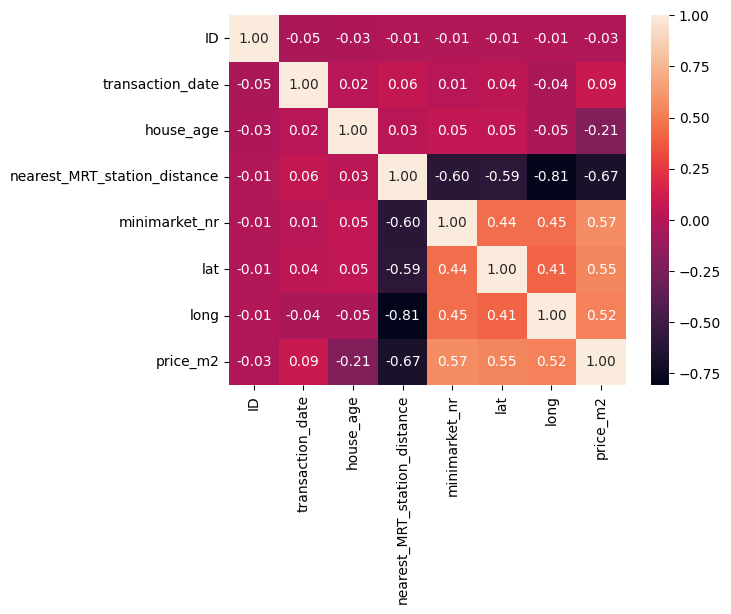

In [4]:
sns.heatmap(real_estate.corr(), annot=True, fmt=".2f")

dalla heatmap noto che il prezzo è influenzato in maniera diretta da latitudine, longitudine e numero di minimarket vicini e in maniera inversa dalla distanza dalla linea metropolitana.
Mentre ID, giorno di transazione e età della casa non sembrano influenzare significativamente la situazione

La latitudine e longitudine mi hanno stupito perchè vuol dire che piu vai a nordest e piu aumenta, ignorando completamente le teoria che vogliono il centro piu costoso.

Questo forse perchè la distanza dalla metro e latitudine, longitudine e market sono correlati, quindi forse abbiamo uno sviluppo metropolitano molto piu forte a nord est

In [5]:
real_estate.columns

Index(['ID', 'transaction_date', 'house_age', 'nearest_MRT_station_distance',
       'minimarket_nr', 'lat', 'long', 'price_m2'],
      dtype='object')

In [6]:
real_estate[['lat', 'long']].describe()

,lat,long
count,414.000000,414.000000
mean,24.969030,121.533361
std,0.012410,0.015347
min,24.932070,121.473530
25%,24.963000,121.528085
50%,24.971100,121.538630
75%,24.977455,121.543305
max,25.014590,121.566270


In [7]:
north_east_point = (real_estate['lat'].max(), real_estate['long'].max())
north_east_point

(np.float64(25.01459), np.float64(121.56627))

In [8]:
import numpy as np


In [9]:
real_estate_ne = real_estate.copy()
real_estate_ne['distance_from_NE'] = np.sqrt(
    (north_east_point[0] - real_estate_ne['lat'])**2 +
    (north_east_point[1] - real_estate_ne['long'])**2
)

real_estate_ne

,ID,transaction_date,house_age,nearest_MRT_station_distance,minimarket_nr,lat,long,price_m2,distance_from_NE
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0.040948
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0.043464
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0.035157
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0.035157
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,0.042519
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,0.096105
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,0.046451
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,0.044134
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,0.054268


<Axes: >

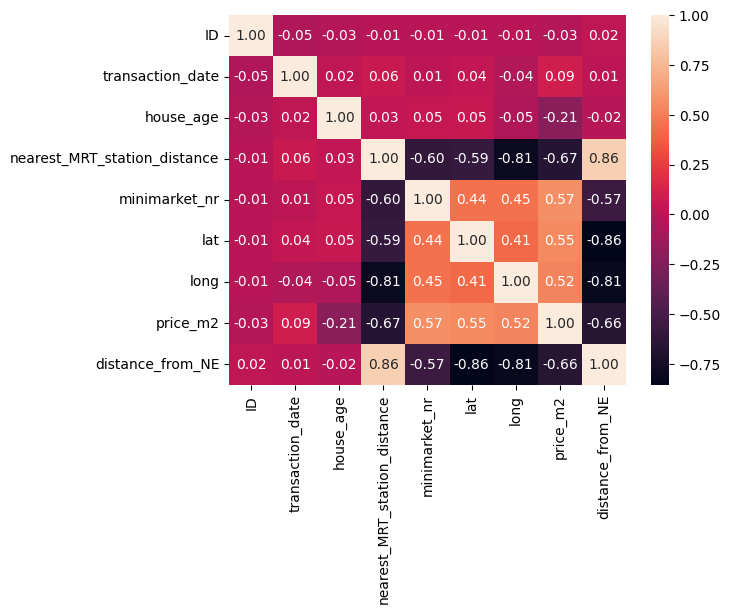

In [10]:
sns.heatmap(real_estate_ne.corr(), annot=True, fmt=".2f")



dalla heatmap risulta che la distanza da nordestha una buona correlazione con la distanza dalle linee metropolitane (+0.86) e dai minimarket (-0.60), ragion per cui credo che la relazione tra distanza dalla casa piu a nordest e il prezzo si possa considerare un effetto collaterale del fatto che la parte nordest della città sia maggiormente sviluppata.

Per questa ragione credo che le features importanti siano 3:
* distanza dalla stazione metropolitana (-0.67)
* numero di minimarket vicini (+0.57)
* e in misura inferiore età della casa (+0.21)


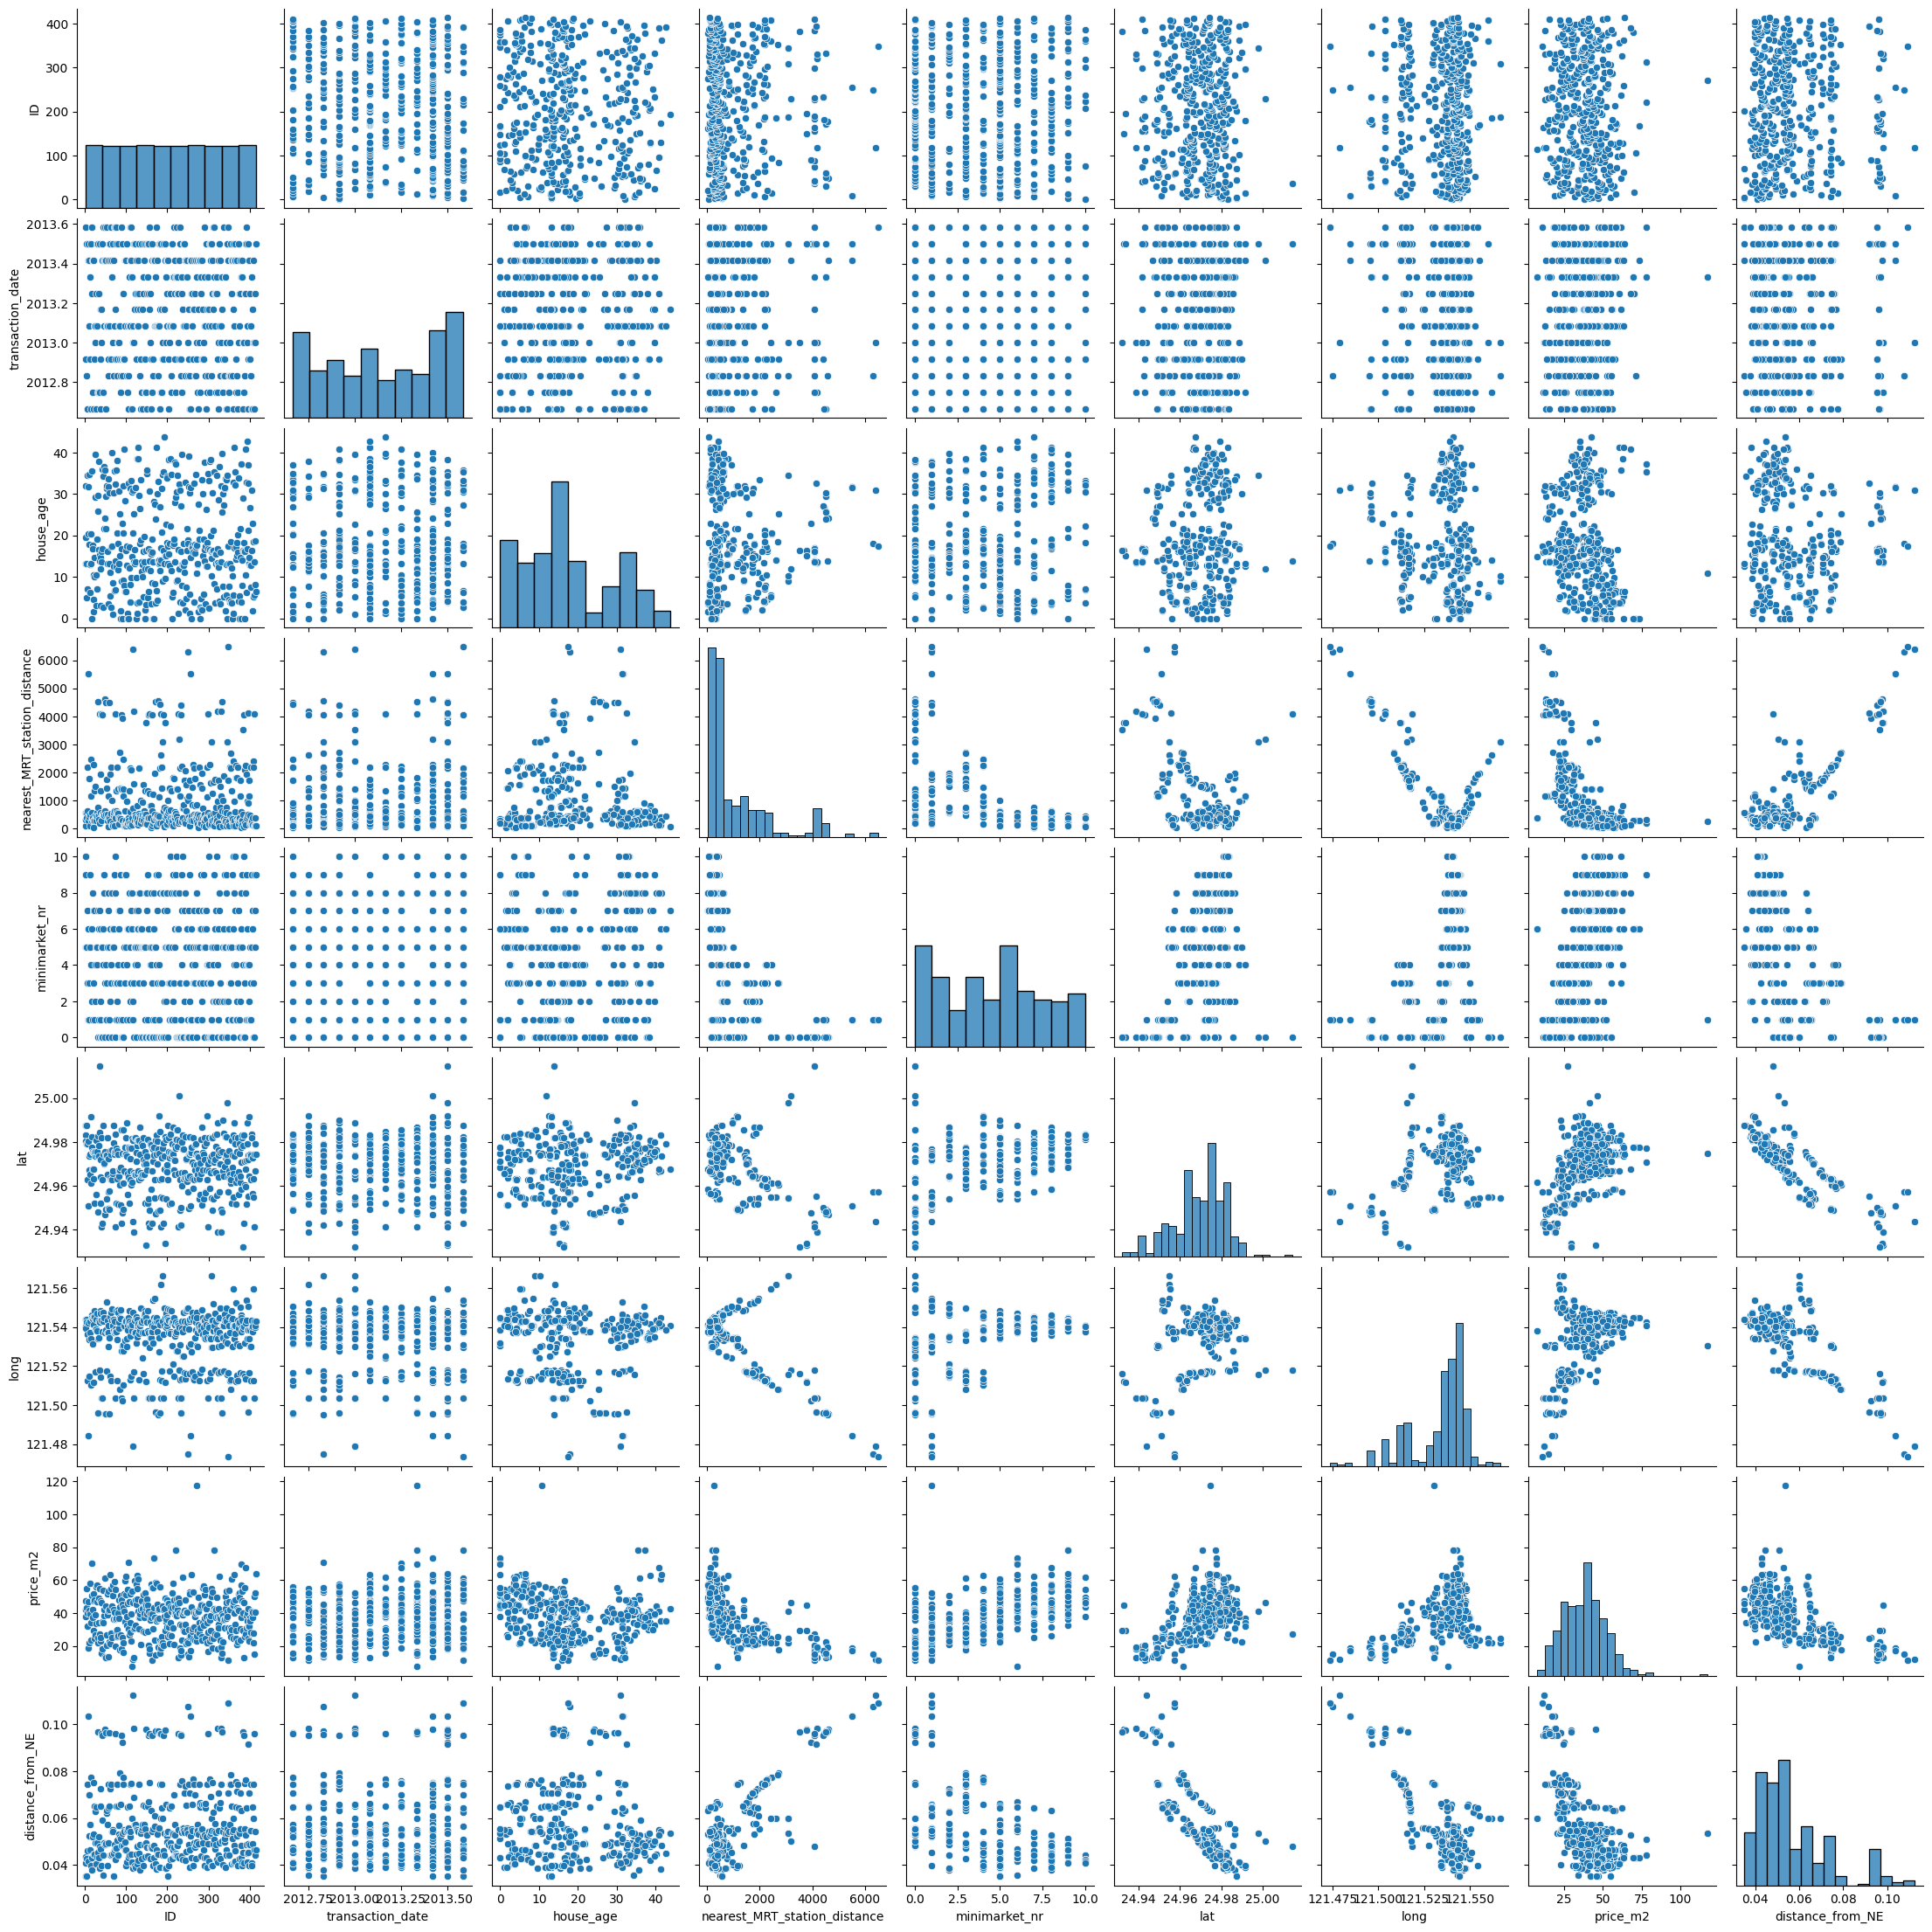

In [11]:
sns.pairplot(real_estate_ne)

In [12]:
features = ['nearest_MRT_station_distance', 'minimarket_nr', 'house_age']
output = 'price_m2'

In [13]:
X = real_estate[features].values
y = real_estate[output].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}")

(289, 3), (289,), (125, 3), (125,)


In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print(f"mse: {mse}, r2s: {r2s}")

mse: 66.34814509179128, r2s: 0.6078320013262352


ora applico la regressione non lineare

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
scores = []

for i in range(1,11):
    pf = PolynomialFeatures(degree=i)
    X_train_poly = pf.fit_transform(X_train)
    X_test_poly = pf.fit_transform(X_test)
    ll = LinearRegression()
    ll.fit(X_train_poly, y_train)
    y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=66.34814509179147 R2=0.6078320013262342
DEGREE 2: MSE=53.951275851573676 R2=0.6811069269934185
DEGREE 3: MSE=58.72502659719495 R2=0.6528904294035061
DEGREE 4: MSE=63.06090827759581 R2=0.6272620710110206
DEGREE 5: MSE=96.47157580799824 R2=0.4297796153730328
DEGREE 6: MSE=849.7100294060713 R2=-4.022432522027395
DEGREE 7: MSE=863.0675427218964 R2=-4.1013855848007115
DEGREE 8: MSE=484.160390553423 R2=-1.8617561370820535
DEGREE 9: MSE=31331.65846069628 R2=-184.19393084255788
DEGREE 10: MSE=413683.18183429586 R2=-2444.1822320051983


la funzione di grado 3 mi pare approssimare meglio il risultato, oltre il quale iniziano problemi di overfitting

ora esamino la stessa situazione ma togliendo il parametro sull'età della casa

In [24]:
features_reduced = ['nearest_MRT_station_distance', 'minimarket_nr']

In [25]:
X_reduced = real_estate[features_reduced].values

In [26]:
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size=0.3)

ss_reduced = StandardScaler()
X_reduced_train_std = ss_reduced.fit_transform(X_reduced_train)
X_reduced_test_std = ss_reduced.transform(X_reduced_test)

In [27]:
scores_reduced = []

for i in range(1,11):
    pf = PolynomialFeatures(degree=i)
    X_train_poly = pf.fit_transform(X_reduced_train)
    X_test_poly = pf.fit_transform(X_reduced_test)
    ll = LinearRegression()
    ll.fit(X_train_poly, y_reduced_train)
    y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(y_reduced_test, y_pred)
    r2 = r2_score(y_reduced_test, y_pred)
    scores_reduced.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=79.04836394251349 R2=0.48471571248459666
DEGREE 2: MSE=83.36527439176143 R2=0.45657552065562723
DEGREE 3: MSE=93.77489618352716 R2=0.3887194097793081
DEGREE 4: MSE=89.2840047283707 R2=0.41799371336213975
DEGREE 5: MSE=84.6824867329315 R2=0.44798914658190303
DEGREE 6: MSE=92.75123219913944 R2=0.3953922609370374
DEGREE 7: MSE=96.86636037823217 R2=0.36856740605021865
DEGREE 8: MSE=99.9368722460608 R2=0.34855198205899884
DEGREE 9: MSE=110.47648581735322 R2=0.27984850738973654
DEGREE 10: MSE=112.31674055916059 R2=0.26785263162222983


Per quanto apparentemente possa sembrare di bassa correlazione, il parametro house_age risulta fondamentale per un modello lineare predittivo.
Ora, per quanto possano apparire ridondanti provo a fare un analisi aggiungendo ache la distanza da nord est

In [28]:
real_estate_ne.columns

Index(['ID', 'transaction_date', 'house_age', 'nearest_MRT_station_distance',
       'minimarket_nr', 'lat', 'long', 'price_m2', 'distance_from_NE'],
      dtype='object')

In [29]:
features_ne = ['nearest_MRT_station_distance', 'minimarket_nr', 'house_age', 'distance_from_NE']



In [30]:
X_ne = real_estate_ne[features_ne].values
y_ne = real_estate_ne[output].values

X_ne_train, X_ne_test, y_ne_train, y_ne_test = train_test_split(X_ne, y_ne, test_size=0.3)

ss_ne = StandardScaler()
X_ne_train_std = ss_ne.fit_transform(X_ne_train)
X_ne_test_std = ss_ne.transform(X_ne_test)

scores_ne = []

for i in range(1,11):
    pf_ne = PolynomialFeatures(degree=i)
    X_train_poly = pf_ne.fit_transform(X_ne_train)
    X_test_poly = pf_ne.fit_transform(X_ne_test)
    ll = LinearRegression()
    ll.fit(X_train_poly, y_ne_train)
    y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(y_ne_test, y_pred)
    r2 = r2_score(y_ne_test, y_pred)
    scores_ne.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))


DEGREE 1: MSE=63.64931558555981 R2=0.5237434684769122
DEGREE 2: MSE=49.88161047804145 R2=0.6267604360784771
DEGREE 3: MSE=49.762165148796214 R2=0.6276541867447588
DEGREE 4: MSE=55.39131466792319 R2=0.5855340288021258
DEGREE 5: MSE=70.48338349458234 R2=0.4726074986930875
DEGREE 6: MSE=94.03221667553345 R2=0.296403159196309
DEGREE 7: MSE=112.51260752274409 R2=0.15812348147923483
DEGREE 8: MSE=98.48622869619176 R2=0.2630759773278819
DEGREE 9: MSE=101.0801500225875 R2=0.2436669394994645
DEGREE 10: MSE=108.9581916334676 R2=0.18471942783692696


In [31]:
scores

[0.6078320013262342,
 0.6811069269934185,
 0.6528904294035061,
 0.6272620710110206,
 0.4297796153730328,
 -4.022432522027395,
 -4.1013855848007115,
 -1.8617561370820535,
 -184.19393084255788,
 -2444.1822320051983]

I risultati finali:

features ['nearest_MRT_station_distance', 'minimarket_nr', 'house_age']
DEGREE 1: MSE=69.78904868146789 R2=0.610683022010126
DEGREE 2: MSE=52.72905202048687 R2=0.7058519126893044
DEGREE 3: MSE=51.108999330929365 R2=0.7148893480634646
DEGREE 4: MSE=59.973707077876824 R2=0.6654377321436526
DEGREE 5: MSE=138.69400797505352 R2=0.22629792108787317
DEGREE 6: MSE=1094.99919929007 R2=-5.108433733130167
DEGREE 7: MSE=228.23674210217717 R2=-0.2732146429883806
DEGREE 8: MSE=1435.1537569730226 R2=-7.00597993770789
DEGREE 9: MSE=32914.2532194541 R2=-182.6115814485097
DEGREE 10: MSE=90637.88248549706 R2=-504.6218298907015

features ridotte ['nearest_MRT_station_distance', 'minimarket_nr']
DEGREE 1: MSE=85.09090890415888 R2=0.49836744592479076
DEGREE 2: MSE=81.65979632619445 R2=0.5185947274049131
DEGREE 3: MSE=81.99500780382024 R2=0.5166185704706141
DEGREE 4: MSE=81.45135587581137 R2=0.5198235368846194
DEGREE 5: MSE=84.96720964672838 R2=0.49909668451491973
DEGREE 6: MSE=105.96172643384047 R2=0.3753286673069245
DEGREE 7: MSE=110.18568864859827 R2=0.35042733552666694
DEGREE 8: MSE=119.619377829143 R2=0.2948133379923542
DEGREE 9: MSE=118.81093733224895 R2=0.2995793003789068
DEGREE 10: MSE=120.66444561242594 R2=0.2886523975574553

fiatures con nord est ['nearest_MRT_station_distance', 'minimarket_nr', 'house_age', 'distance_from_NE']
DEGREE 1: MSE=109.56028838668884 R2=0.4136995488853902
DEGREE 2: MSE=96.75629037957903 R2=0.4822188081734218
DEGREE 3: MSE=98.20114915069337 R2=0.4744867972251542
DEGREE 4: MSE=114.60139211477825 R2=0.386722608303939
DEGREE 5: MSE=435.47594333972717 R2=-1.3304040705743767
DEGREE 6: MSE=144.65366156369424 R2=0.22590102418461533
DEGREE 7: MSE=544.9625899528634 R2=-1.9163104354220502
DEGREE 8: MSE=445.213372060045 R2=-1.382512904308629
DEGREE 9: MSE=2210.2280204388276 R2=-10.827804622745747
DEGREE 10: MSE=2655.13223688032 R2=-13.208663113020867

Dai risultati che ho davanti posso ipotizzare quanto segue:

* applicando le features ['nearest_MRT_station_distance', 'minimarket_nr', 'house_age'] noto un iniziale aumento della precisione fino a raggiungere un errore quadratico medio di 51.1 e un coefficiente di indeterminazione (r2) di 0.71 in una regressione polinomiale di grado 3 mostrandosi un modello buono anche se non eccellente
* applicando le features ['nearest_MRT_station_distance', 'minimarket_nr'] noto un iniziale aumento della precisioni fino al 4 grado dove raggiunge un errore quadratico medio di 81.45 e un coefficiente di indeterminazione di 0.52 mostrando modelli abbastanza scarsi
* applicando le features 'nearest_MRT_station_distance', 'minimarket_nr', 'house_age', 'distance_from_NE'] il modello risulta molto scarso, con il suo punto migliore al grado 2 con mse di 96.76 e r2 di 0.47 mostrando la tendenza del modello ad un overfitting, probabilmente perchè man mano che si va a nordest le metro risultano meglio posizionate e aumentano i minimarket, quindi la distanza a nordest è uan feature che rispecchia le altre 2

prima di finire vorrei fare un quarto tentativo usando solo la distanza verso nordest e l'età della casa

In [32]:
features_ne_reduced = [ 'house_age', 'distance_from_NE']

X_ne_reduced = real_estate_ne[features_ne_reduced].values
y_ne_reduced = real_estate_ne[output].values

X_ne_train_reduced, X_ne_test_reduced, y_ne_train_reduced, y_ne_test_reduced = train_test_split(X_ne_reduced, y_ne_reduced, test_size=0.3)

ss_ne_reduced = StandardScaler()
X_ne_reduced_train_std = ss_ne_reduced.fit_transform(X_ne_train_reduced)
X_ne_reduced_test_std = ss_ne_reduced.transform(X_ne_test_reduced)

scores_ne_reduced = []

for i in range(1,11):
    pf_ne_reduced = PolynomialFeatures(degree=i)
    X_train_poly = pf_ne_reduced.fit_transform(X_ne_train_reduced)
    X_test_poly = pf_ne_reduced.fit_transform(X_ne_test_reduced)
    ll = LinearRegression()
    ll.fit(X_train_poly, y_ne_train_reduced)
    y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(y_ne_test_reduced, y_pred)
    r2 = r2_score(y_ne_test_reduced, y_pred)
    scores_ne_reduced.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))



DEGREE 1: MSE=49.125407849548665 R2=0.64654582898516
DEGREE 2: MSE=47.45040754797822 R2=0.6585973491446334
DEGREE 3: MSE=50.58046192631381 R2=0.6360768078615113
DEGREE 4: MSE=53.79477068101703 R2=0.6129500617231622
DEGREE 5: MSE=57.32886374692215 R2=0.5875224878956959
DEGREE 6: MSE=61.09322063316006 R2=0.5604381805917424
DEGREE 7: MSE=54.83918157482844 R2=0.6054355920662071
DEGREE 8: MSE=81.82406656795425 R2=0.4112810685172753
DEGREE 9: MSE=120.98936601862438 R2=0.12948924111340854
DEGREE 10: MSE=286.1977453419479 R2=-1.0591744934914336


nel caso considerato sopra sembra esserci un problema di underfitting con la distanza da nordest che per quanto appaia ben correlata non riesce a sostituire i 2 parametri che speravo di togliere.

Non credo che usare latitudine e longitudine in maniera separata possa portare grandi risultati visto come è andata sulla distanza da nordest, quindi evito di testare la casistica

Il caso migliore, dai dati disponibili probabilmete si ottiene con le features ['nearest_MRT_station_distance', 'minimarket_nr'] e un polinomio di grado 3